# Books Recommendation system

* Name       :   Aravalam Rajasekhar
* Course     :   B.Tech(3rd year)
* College    :   Sri Venkateswara University College Of Engineering,Tirupati
* gmail      :   rasekhar6@gmail.com
* Mobile no  :   9849692369



# Importing libraries

In [64]:
import turicreate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extracting the dataset

In [65]:
df=turicreate.SFrame.read_csv('/content/sample_data/book selection-1.csv')

Read 100 lines. Lines per second: 777.635

Finished parsing file /content/sample_data/book selection-1.csv

Parsing completed. Parsed 100 lines in 0.144563 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/sample_data/book selection-1.csv

Parsing completed. Parsed 1058 lines in 0.036238 secs.

# Displaying top-10 rows in dataset

In [66]:
df.head()

S.NO,Submitted Time,1. Name,2. select book,3. Number of quantity
1,02-08-2022,Manasa,"Head-First Python,2ndedition ...",2
2,03-08-2022,Rajasekhar,Python Crash course byEric Matthes ...,1
3,03-08-2022,Rajasekhar,"Head-First Python,2ndedition ...",1
4,03-08-2022,Manasa,Data structure andalgorithm through python ...,1
5,03-08-2022,Hari Prakash,python programming:usingproblem solving approach ...,1
6,03-08-2022,Hari Prakash,Data structure andalgorithm through python ...,1
7,03-08-2022,Manogna,Python Crash course byEric Matthes ...,1
8,03-08-2022,Bharathi,"Head-First Python,2ndedition ...",1
9,03-08-2022,Bharathi,"Invent your own computergames with python,4th ...",1
10,03-08-2022,Manogna,"Invent your own computergames with python,4th ...",1


* The dataset consists of 5 variables namely S.NO,Submitted Time,Name,select book,Number of quantity

# Columns description

* S.NO                 -    Serial Number
* Submitted Time       -    Time at which product is submitted
* Name                 -    Name of the customer
* select book          -    Name of the book
* Number of quantity   -    Quantity of the book purchased by the customer

In [67]:
df['Submitted Time'].unique()

dtype: str
Rows: 2
['03-08-2022', '02-08-2022']

In [68]:
df['Submitted Time'].value_counts()

value,count
03-08-2022,1057
02-08-2022,1


# As there is only 1 purchase on 02-08-2022.So,Submitted Time and S.NO column can be removed from dataset

In [69]:
df=df[['1. Name','2. select book','3. Number of quantity']]

In [70]:
df

1. Name,2. select book,3. Number of quantity
Manasa,"Head-First Python,2ndedition ...",2
Rajasekhar,Python Crash course byEric Matthes ...,1
Rajasekhar,"Head-First Python,2ndedition ...",1
Manasa,Data structure andalgorithm through python ...,1
Hari Prakash,python programming:usingproblem solving approach ...,1
Hari Prakash,Data structure andalgorithm through python ...,1
Manogna,Python Crash course byEric Matthes ...,1
Bharathi,"Head-First Python,2ndedition ...",1
Bharathi,"Invent your own computergames with python,4th ...",1
Manogna,"Invent your own computergames with python,4th ...",1


# Unique values of select book column

In [71]:
df['2. select book'].unique()

dtype: str
Rows: 27
['Data science with python', 'Angular for beginners', 'Machine learning and deep learning', 'UX,UI design for beginners', 'Machine learning with python', 'HTML5,CSS3,Javascript php-blackwood', 'Machine learning for beginners', 'Data science from scratch', 'Hands on Machine Learning with scikit-learn', 'Reactjs,the main pillar of web-development', 'live web server with Reactjs and firebase', 'The full stack developer,Chris Northwood', 'The frame work for web-development,angular', 'python programming:using problem solving approach', 'Data structure and algorithm through python', 'Python Crash course by Eric Matthes', 'Data science for dummies', 'Backbone of webdevelopment-angular', 'Think python:how to think like a computer scientist', 'Mastering machine learning algorithm', 'Invent your own computer games with python,4th edition', 'The Data science handbook-Field cady', 'Practical statistics for data scientist', 'HTML,CSS,Javascript web publishing', 'Head-First Pytho

# Adding new feature named zoner to the dataset which describes the category of the book

In [72]:
data_science=['Data science with python','Machine learning and deep learning','Machine learning with python','Machine learning for beginners','Data science from scratch','Hands on Machine Learning with scikit-learn','Data science for dummies','Mastering machine learning algorithm','The Data science handbook-Field cady','Practical statistics for data scientist']
web_dev=['Angular for beginners','UX,UI design for beginners','HTML5,CSS3,Javascript php-blackwood','Reactjs,the main pillar of web-development','live web server with Reactjs and firebase','The full stack developer,Chris Northwood','The frame work for web-development,angular','Backbone of webdevelopment-angular','HTML,CSS,Javascript web publishing','Reactjs for beginners','App development using Java &XML']
python=['python programming:using problem solving approach','Data structure and algorithm through python','Python Crash course by Eric Matthes','Think python:how to think like a computer scientist','Invent your own computer games with python,4th edition','Head-First Python,2nd edition']
def create_zoner(x):
  if x in data_science:return 'data science'
  elif x in web_dev:return 'web dev'
  elif x in python: return 'python'
df['zoner']=df['2. select book'].apply(create_zoner)

# Dataset after adding new variable

In [73]:
df

1. Name,2. select book,3. Number of quantity,zoner
Manasa,"Head-First Python,2ndedition ...",2,python
Rajasekhar,Python Crash course byEric Matthes ...,1,python
Rajasekhar,"Head-First Python,2ndedition ...",1,python
Manasa,Data structure andalgorithm through python ...,1,python
Hari Prakash,python programming:usingproblem solving approach ...,1,python
Hari Prakash,Data structure andalgorithm through python ...,1,python
Manogna,Python Crash course byEric Matthes ...,1,python
Bharathi,"Head-First Python,2ndedition ...",1,python
Bharathi,"Invent your own computergames with python,4th ...",1,python
Manogna,"Invent your own computergames with python,4th ...",1,python


# pie chart of books category zoner

([<matplotlib.patches.Wedge at 0x7f7de189e290>,
 [Text(-0.13358803068594904, 1.0918581583967077, 'data science - 53.875236294896034%'),
  Text(-0.26836710075601217, -1.0667610319241196, 'web dev - 34.40453686200378%'),
  Text(1.0262737487850524, -0.3959320554775471, 'python - 11.720226843100189%')])

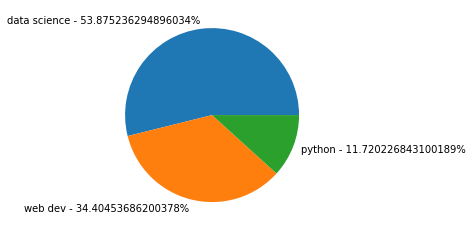

In [74]:
x=[]
for i in df['zoner'].value_counts()['value']:
  y=len(df[df['zoner']==i])/len(df)*100
  x.append(i+' - '+str(y)+'%')
plt.pie(df['zoner'].value_counts()['count'],labels=x)

# Nearly half of the customers are consuming data science related books(53.8 %) followed by webdev(34.4 %)

In [75]:
df['2. select book'].value_counts()

value,count
Data science with python,105
Data science for dummies,86
Machine learning withpython ...,71
Data science from scratch,64
Practical statistics fordata scientist ...,61
Machine learning forbeginners ...,59
"UX,UI design forbeginners ...",55
"HTML5,CSS3,Javascriptphp-blackwood ...",53
The Data sciencehandbook-Field cady ...,52
App development usingJava &XML ...,51


# Counting each book in bar plot (in descending order)

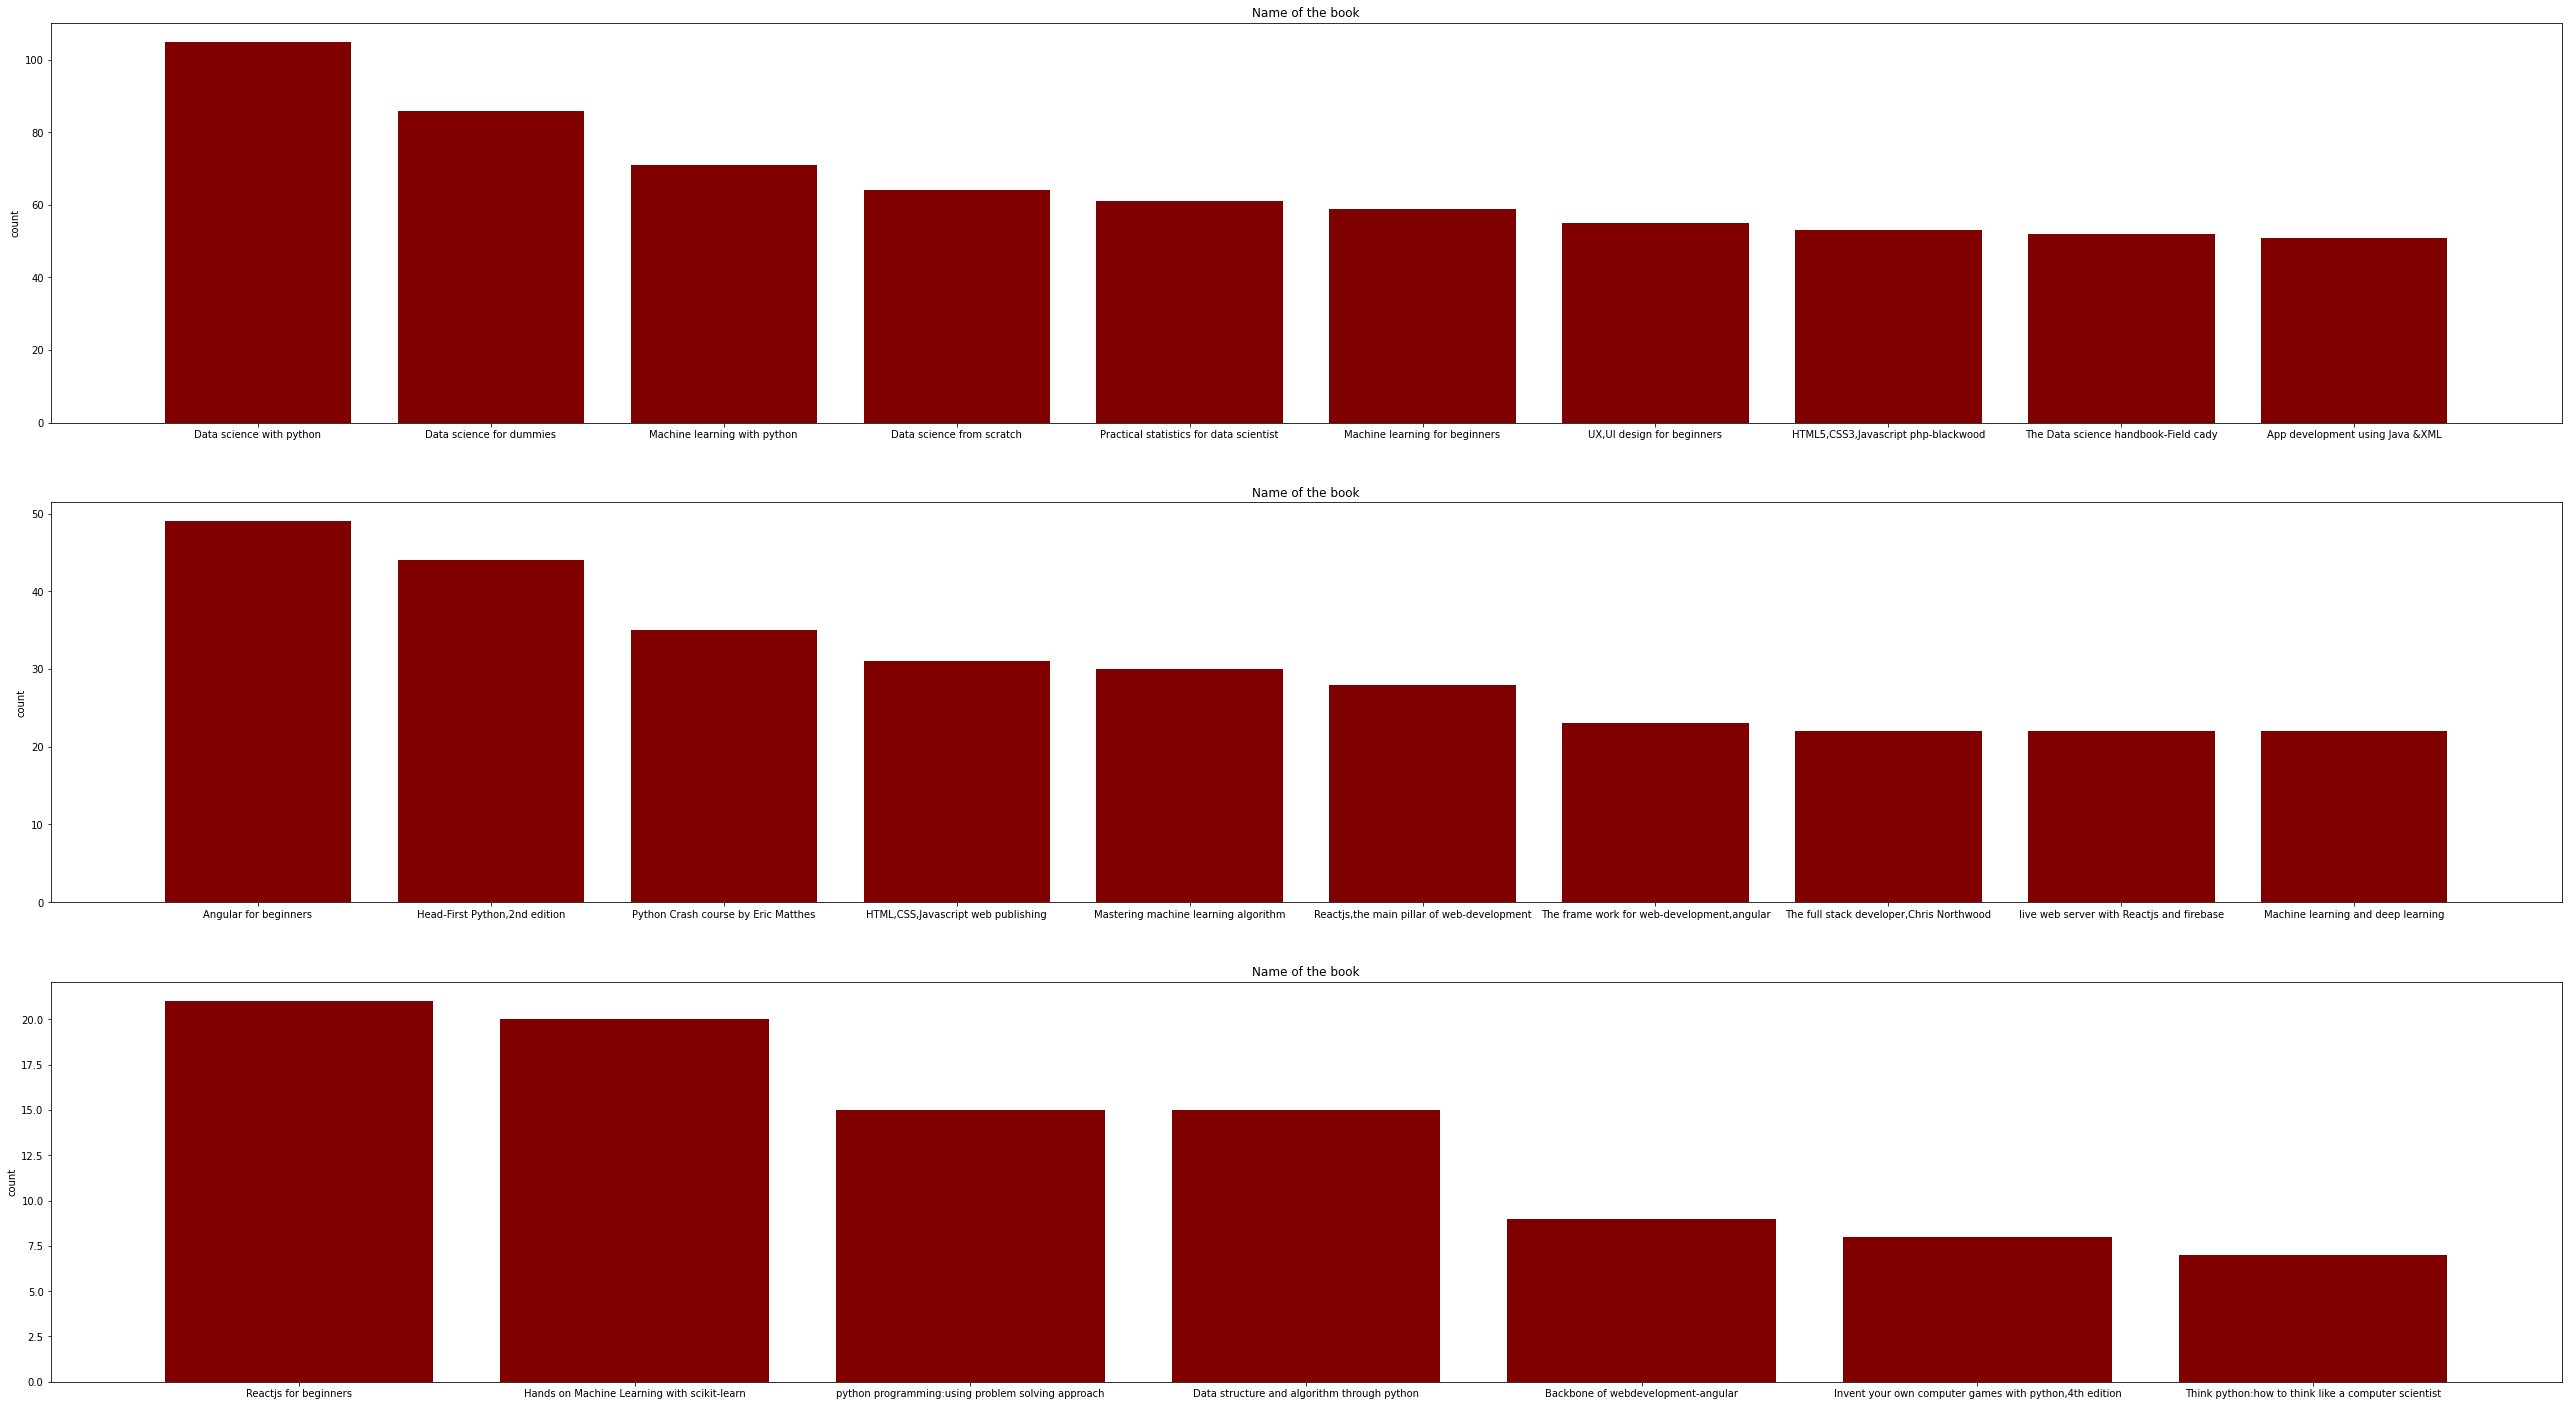

In [76]:
fig = plt.figure(figsize = (45,25))
plt.subplot(3,1,1)
plt.bar(df['2. select book'].value_counts()['value'][:10], df['2. select book'].value_counts()['count'][:10], color ='maroon')
plt.ylabel('count')
plt.title('Name of the book')
plt.subplot(3,1,2)
plt.bar(df['2. select book'].value_counts()['value'][10:20], df['2. select book'].value_counts()['count'][10:20], color ='maroon')
plt.ylabel('count')
plt.title('Name of the book')
plt.subplot(3,1,3)
plt.bar(df['2. select book'].value_counts()['value'][20:28], df['2. select book'].value_counts()['count'][20:28], color ='maroon')
plt.ylabel('count')
plt.title('Name of the book')
plt.show()

# Observation in customers purchase history :
* The top-5 books purchased by the customers are Data science with python,Data science for dummies,Machine learning with python,Practical statistics for data scientist,Machine Learning for beginners.
* Customers are showing interest to buy Datascience related books followed by web development books.

# Each book count in category wise by bar plot

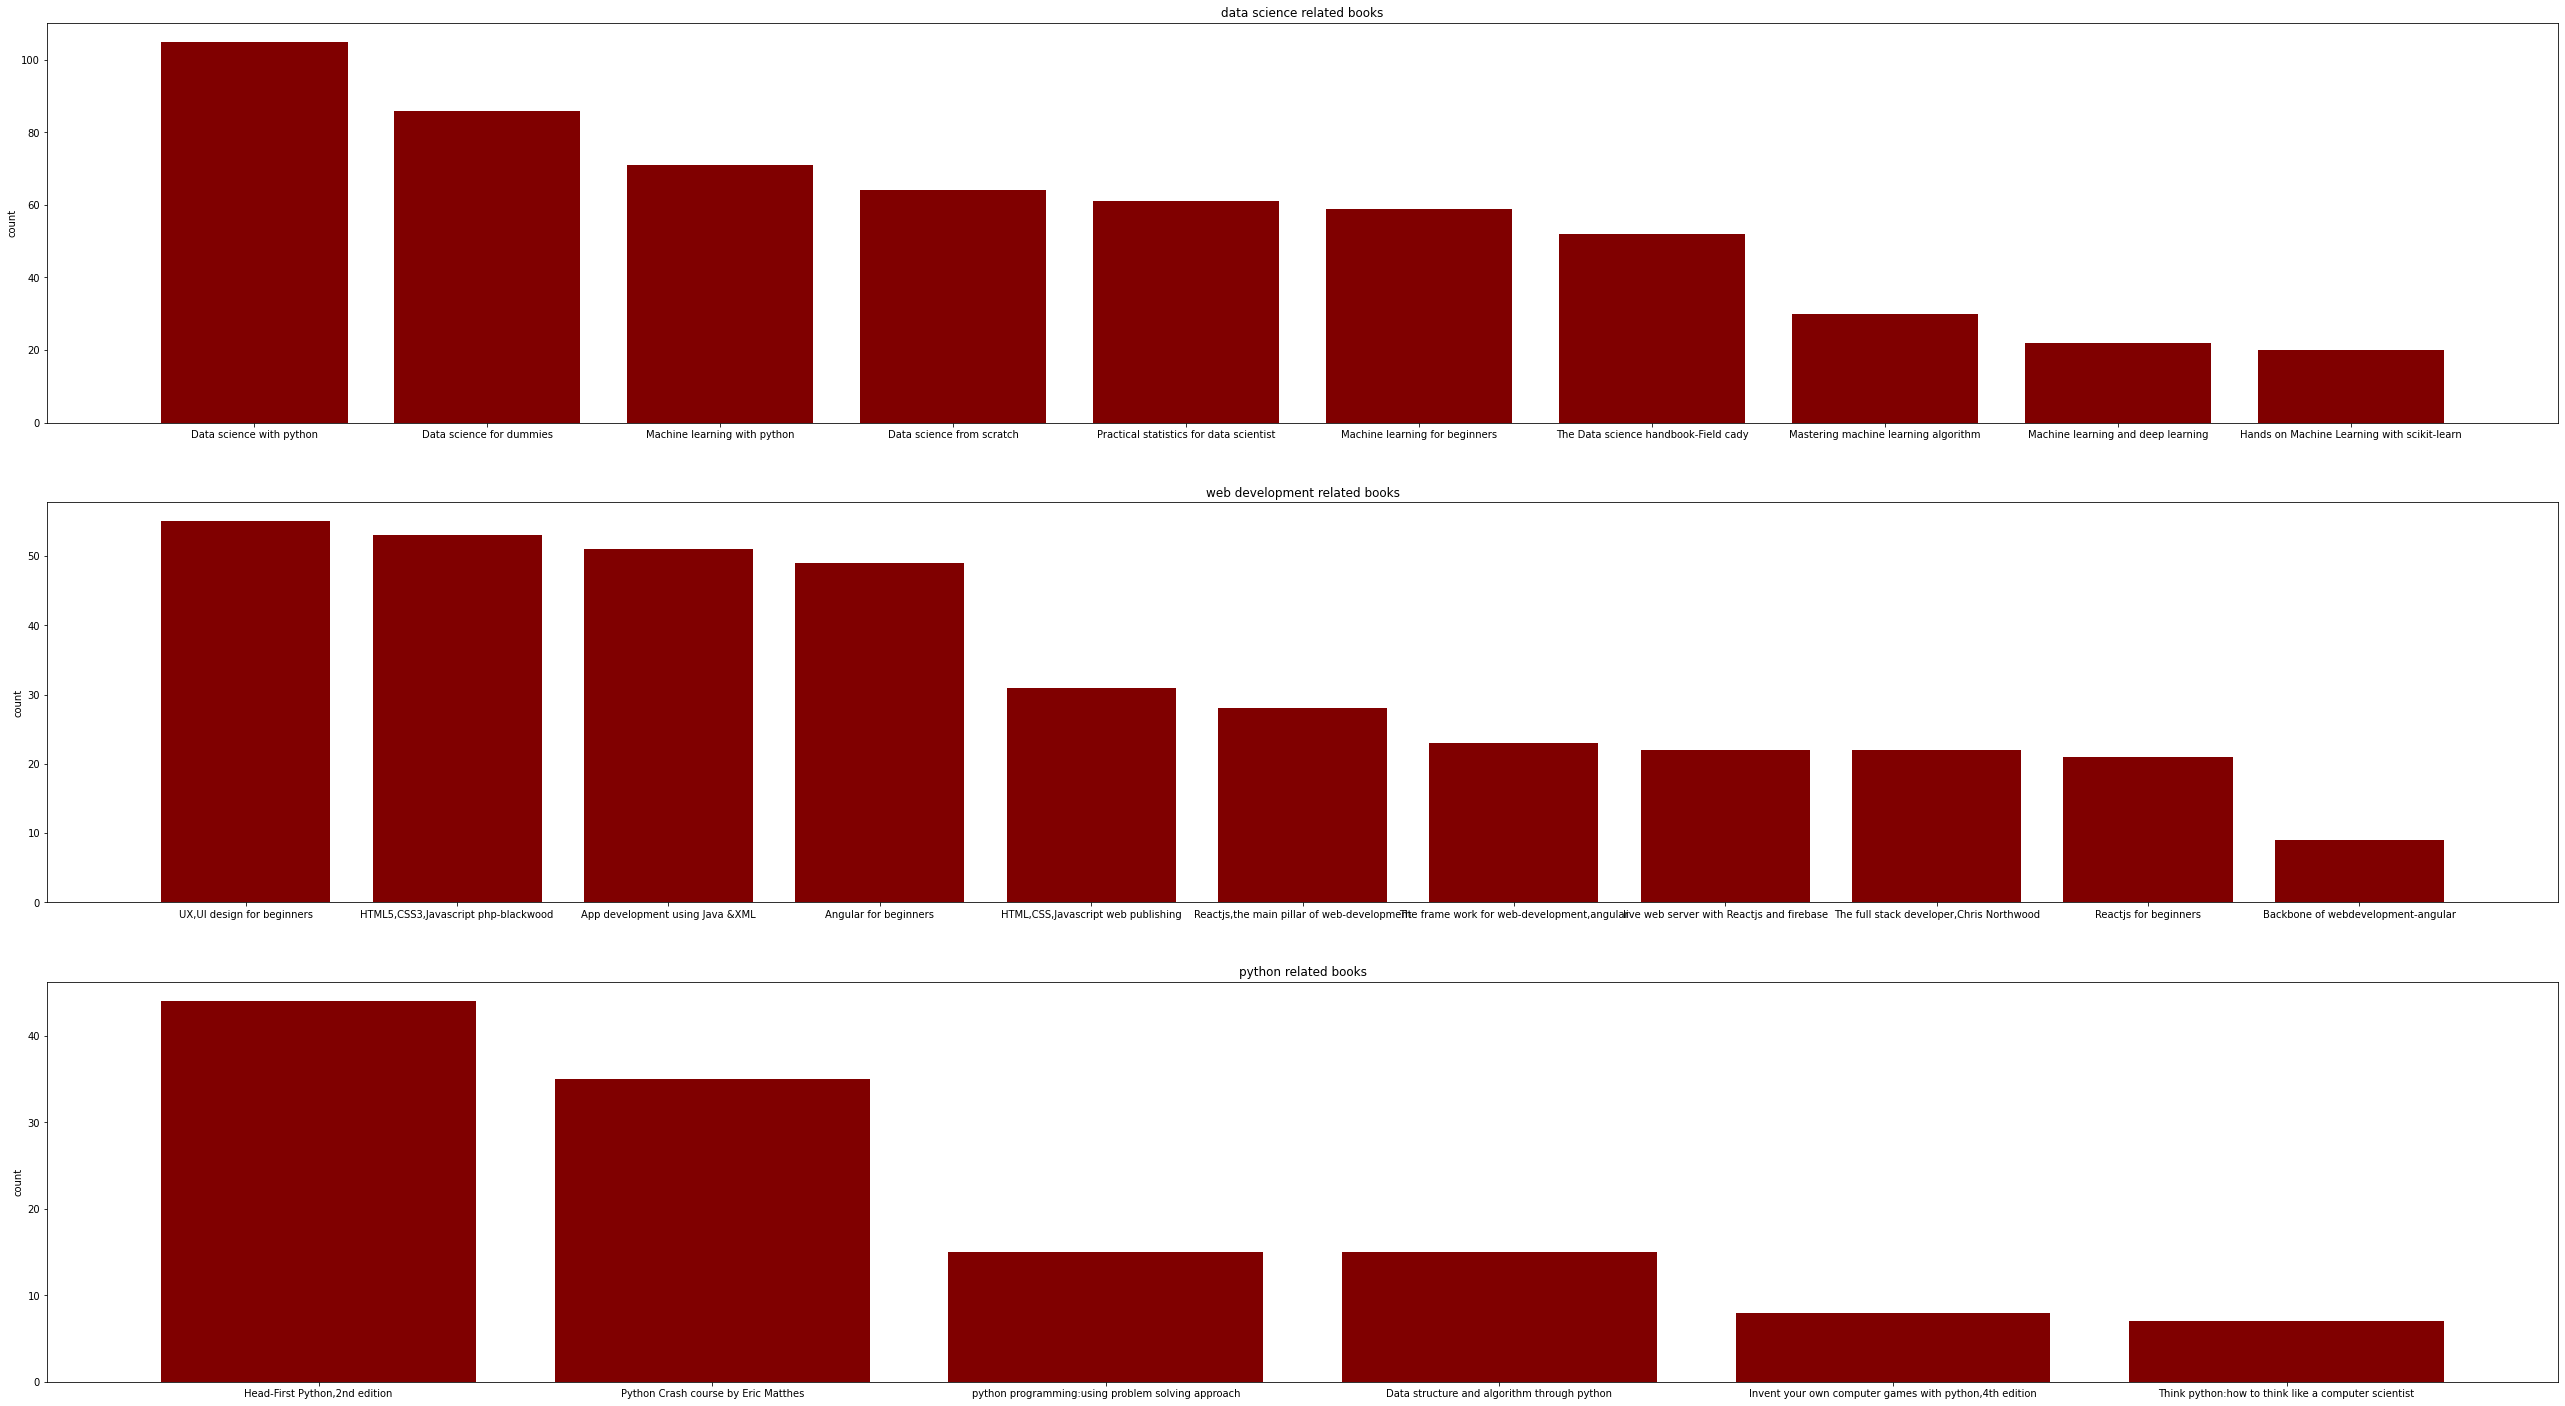

In [77]:
fig = plt.figure(figsize = (45,25))
plt.subplot(3,1,1)
plt.bar(df[df['zoner']=='data science']['2. select book'].value_counts()['value'], df[df['zoner']=='data science']['2. select book'].value_counts()['count'], color ='maroon')
plt.title('data science related books')
plt.ylabel('count')
plt.subplot(3,1,2)
plt.bar(df[df['zoner']=='web dev']['2. select book'].value_counts()['value'], df[df['zoner']=='web dev']['2. select book'].value_counts()['count'], color ='maroon')
plt.title('web development related books')
plt.ylabel('count')
plt.subplot(3,1,3)
plt.bar(df[df['zoner']=='python']['2. select book'].value_counts()['value'], df[df['zoner']=='python']['2. select book'].value_counts()['count'], color ='maroon')
plt.title('python related books')
plt.ylabel('count')
plt.show()

# Observation in category-wise books purchase history :

* In Datascience category,customers are mostly showing interest in purchasing  Datascience related books
* Books namely Datasciene with python,Datascience for dummies,Machine learning with python are sold more than 50 quantities each.
* UX,UI design for beginners, HTML,CSS3,Javascript php-blackwood,App development using Java & XML,Angular are sold in large number in web-dev category.
* In python category,Head first python-2nd edition,Python crash course by Eric Mathews are sold in large number.



# Number of times,customers ordered the books

In [78]:
df['1. Name'].value_counts()

value,count
E Pradeep,6
Y Pradeep,6
P Pradeep,5
G Surya,5
Sree krishna,5
Yamini,5
G Ratnakumar,5
M Pradeep,5
A Mahathi,5
L Surya,5


# Number of books purchased by the customers

In [79]:

x,y=[],[]
for i in df['1. Name'].unique():
  x.append(i)
  y.append(df[df['1. Name']==i]['3. Number of quantity'].sum())
books_count=turicreate.SFrame({'Name of the customers':x,'Number of books purchased':y})
books_count.sort('Number of books purchased',ascending=False)

Name of the customers,Number of books purchased
Y Pradeep,7
E Pradeep,6
Sree krishna,5
P Pradeep,5
U Rajasekhar,5
A Mahathi,5
Yamini,5
L Surya,5
G Surya,5
M Pradeep,5


# Top-10 buyers list

In [80]:
highest_books_count=books_count.sort('Number of books purchased',ascending=False).head()
highest_books_count

Name of the customers,Number of books purchased
Y Pradeep,7
E Pradeep,6
Sree krishna,5
P Pradeep,5
U Rajasekhar,5
A Mahathi,5
Yamini,5
L Surya,5
G Surya,5
M Pradeep,5


In [81]:
reg_cust=highest_books_count['Name of the customers']
reg_cust

dtype: str
Rows: 10
['Y Pradeep', 'E Pradeep', 'Sree krishna', 'P Pradeep', 'U Rajasekhar', 'A Mahathi', 'Yamini', 'L Surya', 'G Surya', 'M Pradeep']

# Analysing the data of books purchased by customers in more number

In [82]:
x=[]
for i in df['1. Name']:
  x.append(df[df['1. Name']==i]['3. Number of quantity'].sum())
df['Total_books']=x
df
df=df.sort('Total_books',ascending=False)
df=df[['1. Name','2. select book','3. Number of quantity','zoner']]
df

1. Name,2. select book,3. Number of quantity,zoner
Y Pradeep,The Data sciencehandbook-Field cady ...,1,data science
Y Pradeep,Practical statistics fordata scientist ...,1,data science
Y Pradeep,The Data sciencehandbook-Field cady ...,1,data science
Y Pradeep,Data science with python,1,data science
Y Pradeep,Data science for dummies,1,data science
Y Pradeep,Data science from scratch,2,data science
E Pradeep,Python Crash course byEric Matthes ...,1,python
E Pradeep,Data science with python,1,data science
E Pradeep,Machine learning withpython ...,1,data science
E Pradeep,"Head-First Python,2ndedition ...",1,python


# Analysing top-10 buyers purchase list

In [83]:
books_list=[]
for i in reg_cust:
  books_list.extend(df[df['1. Name']==i]['2. select book'])
books_list=turicreate.SFrame({'books_list':books_list})
books_list=books_list['books_list'].value_counts()
books_list['zoner']=books_list['value'].apply(create_zoner)
books_list

value,count,zoner
Angular for beginners,6,web dev
Machine learning withpython ...,5,data science
Practical statistics fordata scientist ...,5,data science
The Data sciencehandbook-Field cady ...,5,data science
Data science with python,4,data science
"HTML,CSS,Javascript webpublishing ...",4,web dev
Data science from scratch,4,data science
Data science for dummies,4,data science
Reactjs for beginners,3,web dev
Mastering machinelearning algorithm ...,2,data science


# Top-5 books purchased by top-10 buyers

In [84]:
print('Top-5 books most frequently purchased by top-10 buyers are :')
books_list['value'][:5]

Top-5 books most frequently purchased by top-10 buyers are :


dtype: str
Rows: 5
['Angular for beginners', 'Machine learning with python', 'Practical statistics for data scientist', 'The Data science handbook-Field cady', 'Data science with python']

# Bar plot of top-5 books purchased by top-10 buyers

Text(0.5, 1.0, 'Name of the book')

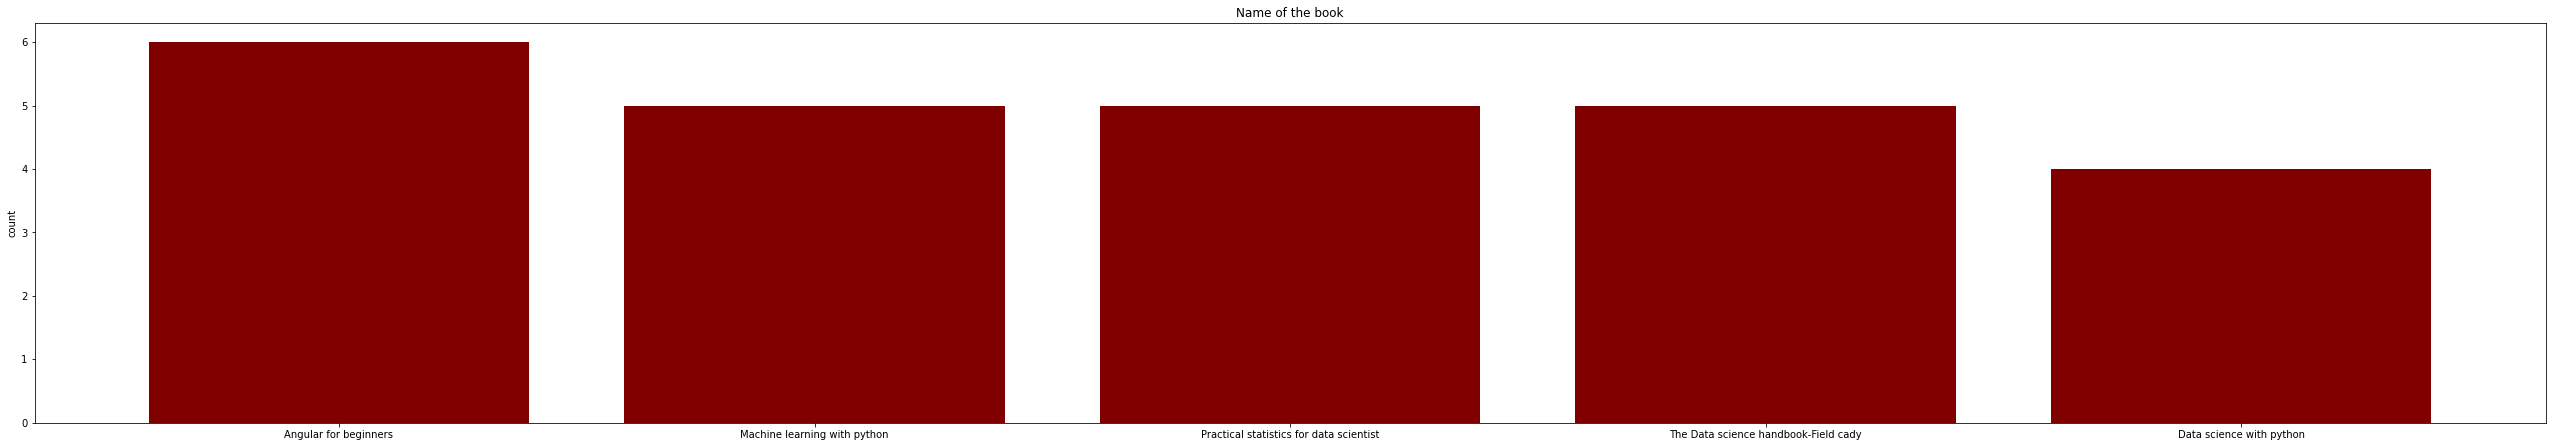

In [85]:
fig = plt.figure(figsize = (45,25))
plt.subplot(3,1,1)
plt.bar(books_list['value'][:5], books_list['count'][:5], color ='maroon')
plt.ylabel('count')
plt.title('Name of the book')

* Top-5 books purchased by top-10 buyers ar Angular for beginners,Machine learning with python,Practical statistics for data scientist,Practical statistics for data scientist,The Data science handbook-Field cady,Data science with python
* Exceptionally Angular for beginners tops in the list of top buyers purchase list

# List of books purchased by top-10 buyers in category-wise

In [86]:
print('data science zoner  :  ',books_list[books_list['zoner']=='data science']['value'])
print('web dev zoner  :  ',books_list[books_list['zoner']=='web dev']['value'])
print('python zoner  :  ',books_list[books_list['zoner']=='python']['value'])

data science zoner  :   ['Machine learning with python', 'Practical statistics for data scientist', 'The Data science handbook-Field cady', 'Data science with python', 'Data science from scratch', 'Data science for dummies', 'Mastering machine learning algorithm', 'Hands on Machine Learning with scikit-learn', 'Machine learning for beginners', 'Machine learning and deep learning', ... ]
web dev zoner  :   ['Angular for beginners', 'HTML,CSS,Javascript web publishing', 'Reactjs for beginners', 'The full stack developer,Chris Northwood', 'HTML5,CSS3,Javascript php-blackwood', ... ]
python zoner  :   ['Python Crash course by Eric Matthes', 'Head-First Python,2nd edition', ... ]


# Bar plot of each book count purchased by top-10 buyers in category wise

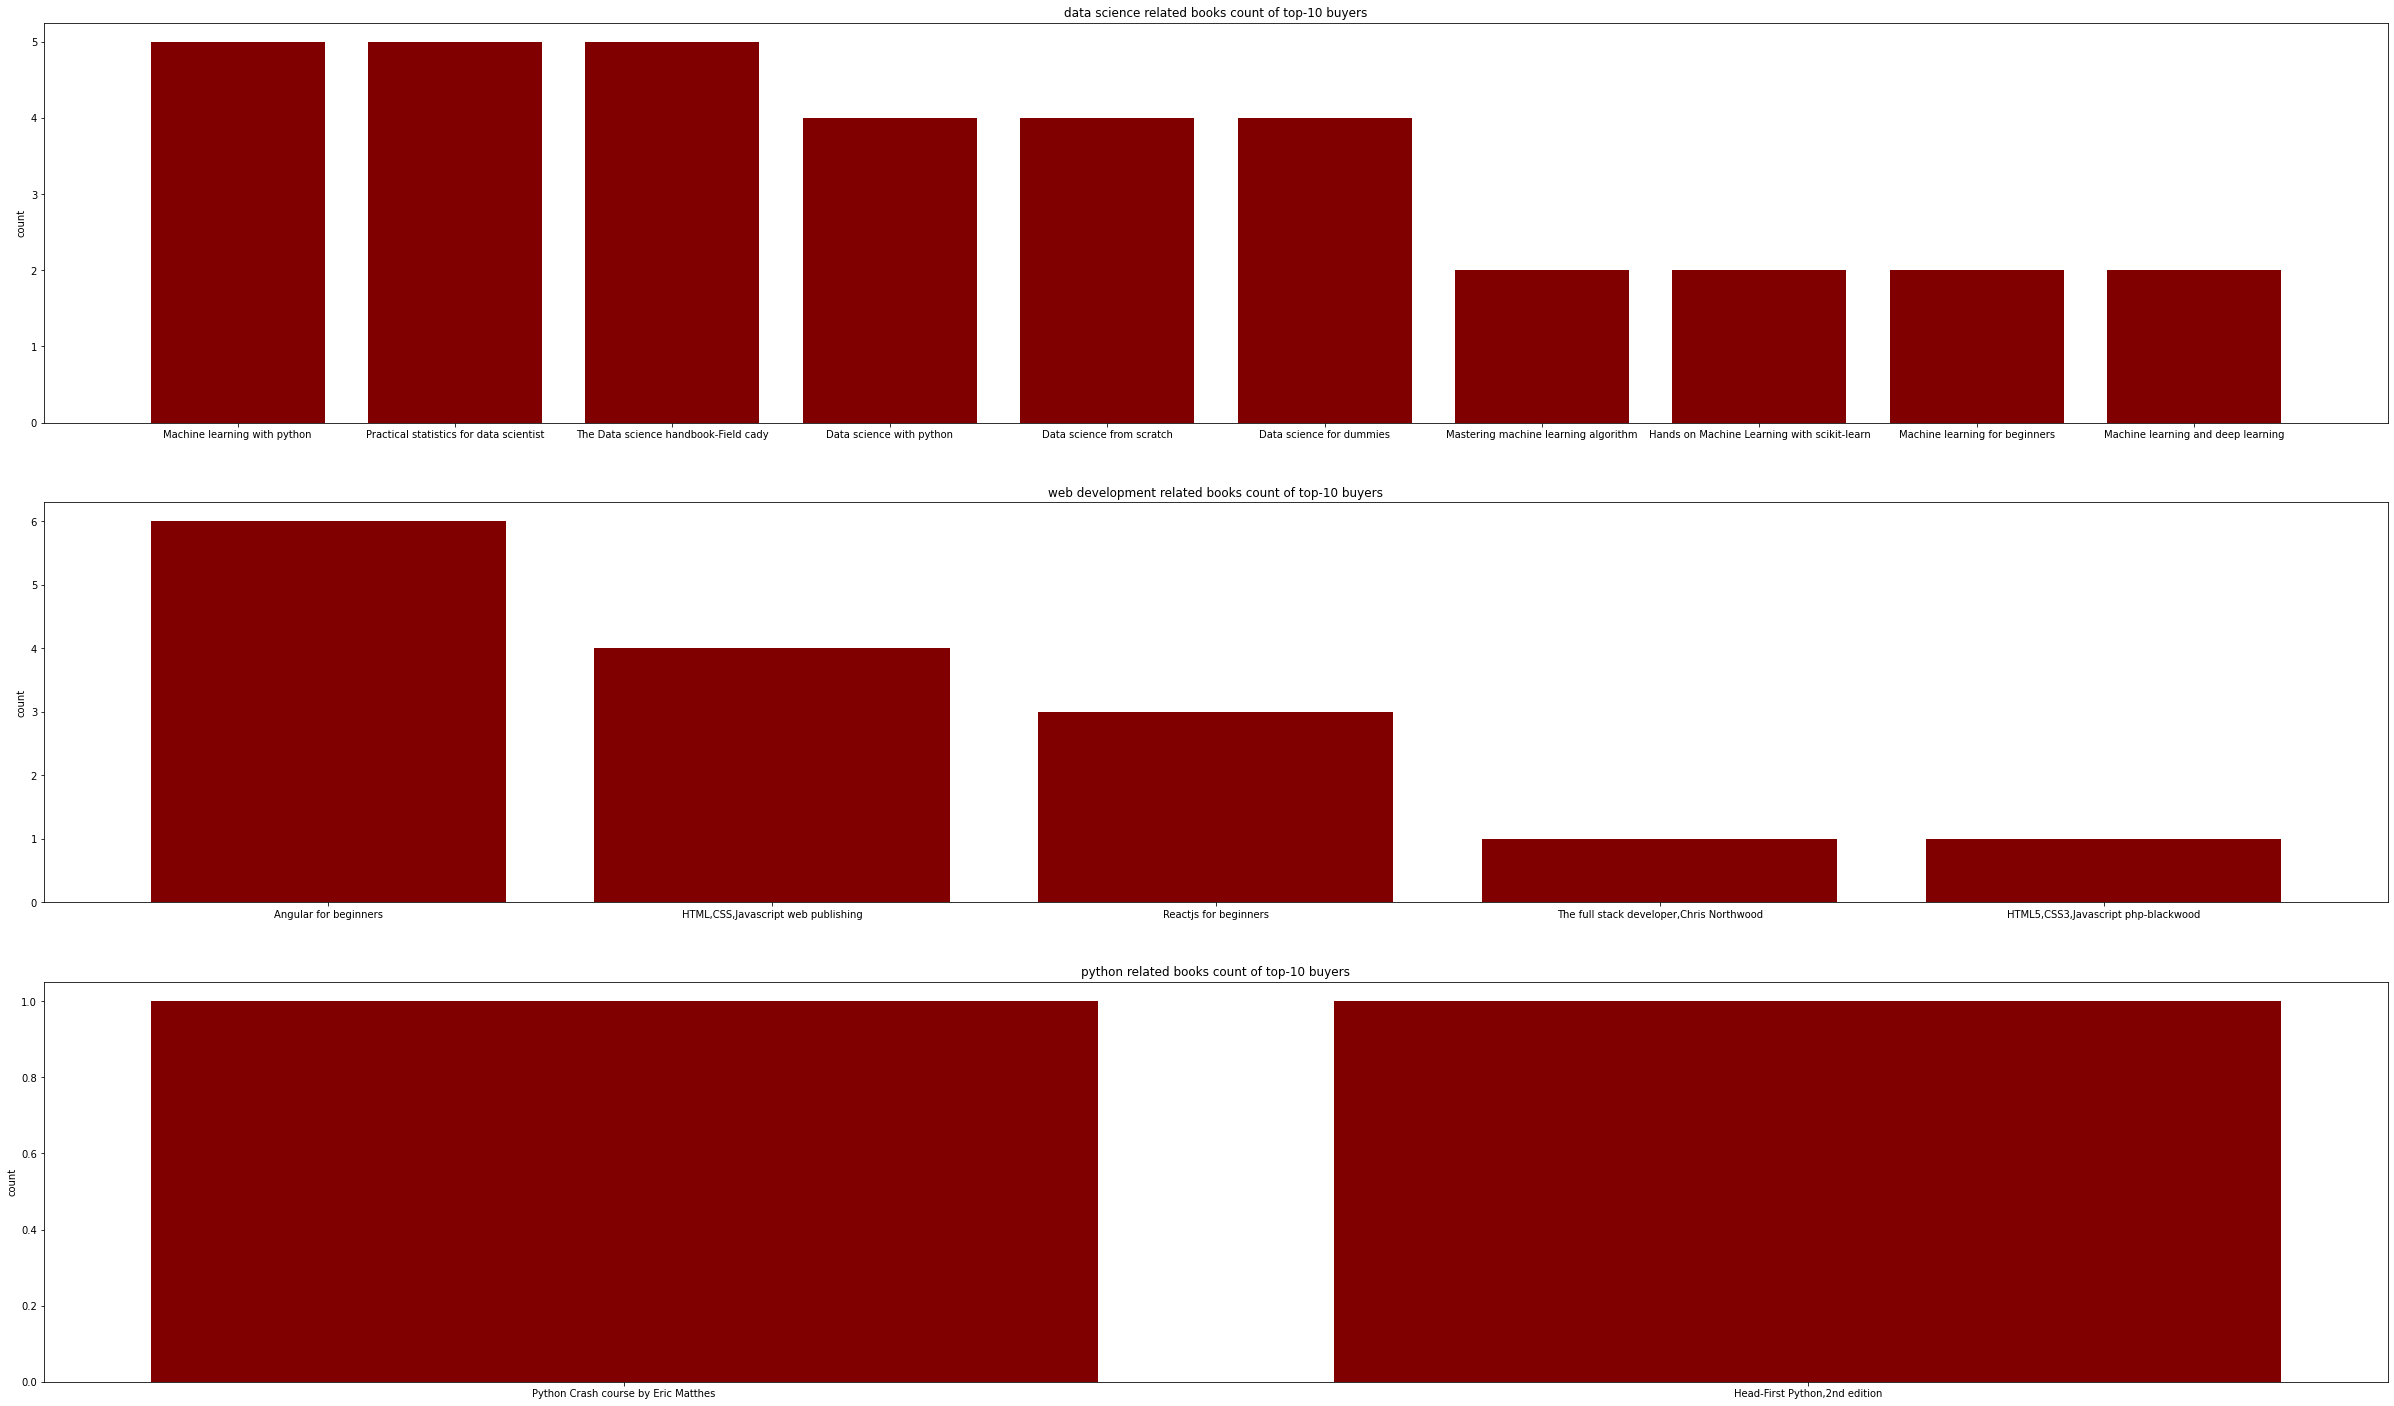

In [87]:
fig = plt.figure(figsize = (42,25))
plt.subplot(3,1,1)
plt.bar(books_list[books_list['zoner']=='data science']['value'], books_list[books_list['zoner']=='data science']['count'], color ='maroon')
plt.title('data science related books count of top-10 buyers')
plt.ylabel('count')
plt.subplot(3,1,2)
plt.bar(books_list[books_list['zoner']=='web dev']['value'], books_list[books_list['zoner']=='web dev']['count'], color ='maroon')
plt.title('web development related books count of top-10 buyers')
plt.ylabel('count')
plt.subplot(3,1,3)
plt.bar(books_list[books_list['zoner']=='python']['value'], books_list[books_list['zoner']=='python']['count'], color ='maroon')
plt.title('python related books count of top-10 buyers')
plt.ylabel('count')
plt.show()

# Observation in top-10 buyers purchase list:

* Datascience related books are more in the purchase history of top buyers(35 books).
* Machine learning with python,Practical statistics for datascientist,The Datascience handbook : field cady,Datascience with python,Datascience from scratch,Datascience for dummies are the books which are more frequently purchased by top-10 buyers.
* Angular for beginners book is purchased most frequently by top buyers in web-dev category as it also tops in the overall list of top-10 buyers purchase history.
* HTML,CSS,Javascript web publishing,Reactjs for beginners are also in top buyers purchase list in web-dev category next to Angular for beginners.
* In python category,only 2 books are purchased by top-10 buyers namely python crash course by Eric Mathews,Head First python,2nd edition.


# Category wise books count purchased by top-10 buyers

([<matplotlib.patches.Wedge at 0x7f7de39ce610>,
 [Text(1.0919797609110324, 0.132590353196169, 'python - 2'),
  Text(0.45145408419195476, 1.0030898314041488, 'web dev - 15'),
  Text(-0.5690715871207662, -0.9413594046547006, 'data science - 35')])

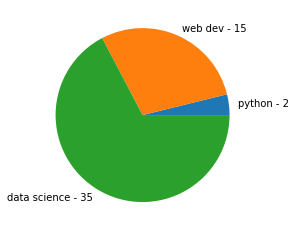

In [88]:
x,z=[],[]
for i in books_list['zoner'].unique():
  y=books_list[books_list['zoner']==i]['count'].sum()
  x.append(i+' - '+str(y))
  z.append(y)
plt.pie(z,labels=x)

# The top buyers also purchased Datascience related books in more number(35).

# Splitting into train & test data

In [89]:
train_data,test_data=df.random_split(.8,seed=0)
train_data.export_csv('train-data.csv')
test_data.export_csv('test-data.csv')

# Using item_similarity_recommender

In [90]:
books_recommendation_system=turicreate.item_similarity_recommender.create(train_data,user_id='1. Name',item_id='2. select book')

Warning: Ignoring columns 3. Number of quantity, zoner;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 843 observations with 503 users and 27 items.

# Recommending the books to existing customer based on their purchase

In [92]:
print('Customer purchased : ',df[df['1. Name']=='G Rajasekhar']['2. select book'])
books_recommender=books_recommendation_system.recommend(users=['G Rajasekhar'])
books_recommendation_list=books_recommender['2. select book']
print('Other Recommendations  :  ')
books_recommendation_list[:5]

Customer purchased :  ['App development using Java &XML', 'Angular for beginners', 'Reactjs for beginners', ... ]
Other Recommendations  :  


dtype: str
Rows: 5
['UX,UI design for beginners', 'Reactjs,the main pillar of web-development', 'live web server with Reactjs and firebase', 'The frame work for web-development,angular', 'HTML5,CSS3,Javascript php-blackwood']